In [49]:
import os
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import struct
import cv2

In [3]:
def load_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [11]:
x_train=load_idx('C:/Users/Mitesh/Desktop/jupyter project/Image processing/Perceptron/archive (3)/train-images.idx3-ubyte')
y_train=load_idx('C:/Users/Mitesh/Desktop/jupyter project/Image processing/Perceptron/archive (3)/train-labels.idx1-ubyte')

x_test=load_idx('C:/Users/Mitesh/Desktop/jupyter project/Image processing/Perceptron/archive (3)/t10k-images.idx3-ubyte')
y_test=load_idx('C:/Users/Mitesh/Desktop/jupyter project/Image processing/Perceptron/archive (3)/t10k-labels.idx1-ubyte')

In [39]:
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
# Make sure x_train and y_train are numpy arrays or tensors, not strings
print(type(x_train))
print(type(y_train))

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


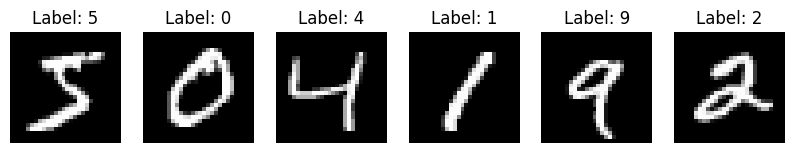

In [22]:
def plot_images(images, labels, num_images=5):
    # Create a figure for displaying images
    plt.figure(figsize=(10, 2))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)  # Create a subplot for each image
        plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
        plt.title(f'Label: {labels[i]}')  # Set the title as the corresponding label
        plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()  # Show the plot with the selected images and labels
# Example: Plot 5 images and their corresponding labels    
plot_images(x_train, y_train, num_images=6)

In [23]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [63]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation ='relu'))
model.add(tf.keras.layers.Dense(256, activation ='relu'))
model.add(tf.keras.layers.Dense(128, activation ='relu'))
model.add(tf.keras.layers.Dense(10, activation ='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10)
model.save('my_model')

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2127 - accuracy: 0.9356
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0886 - accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0599 - accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0448 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0366 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0261 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0256 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.017

INFO:tensorflow:Assets written to: my_model\assets


In [64]:
model1=tf.keras.models.load_model('my_model')

In [65]:
loss,accuracy = model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1117 - accuracy: 0.9765


1/1 [==============================] - 0s 58ms/step
this image is probably a 1


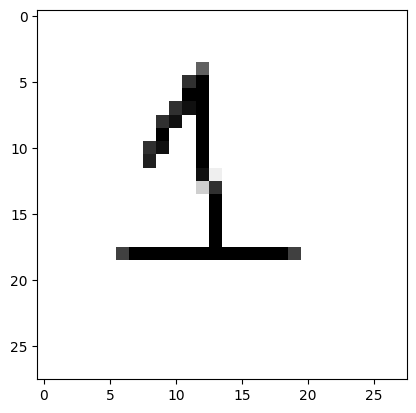

1/1 [==============================] - 0s 18ms/step
this image is probably a 2


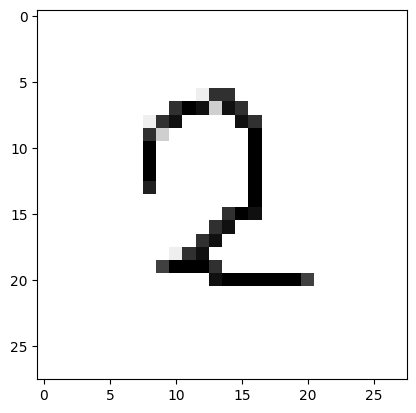

1/1 [==============================] - 0s 17ms/step
this image is probably a 3


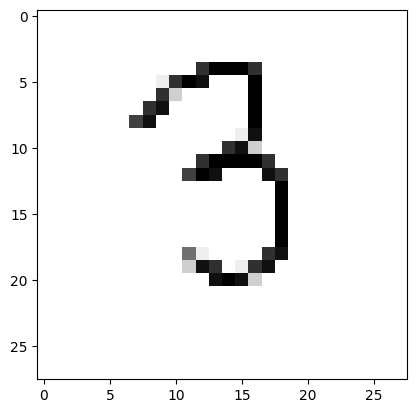

1/1 [==============================] - 0s 17ms/step
this image is probably a 4


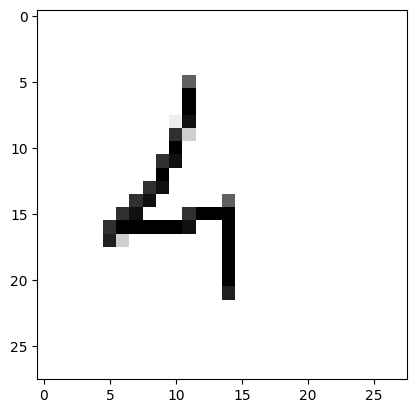

1/1 [==============================] - 0s 17ms/step
this image is probably a 5


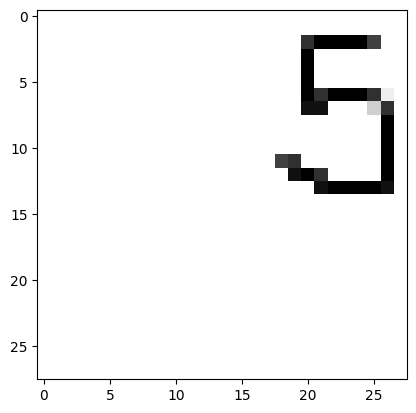

1/1 [==============================] - 0s 17ms/step
this image is probably a 3


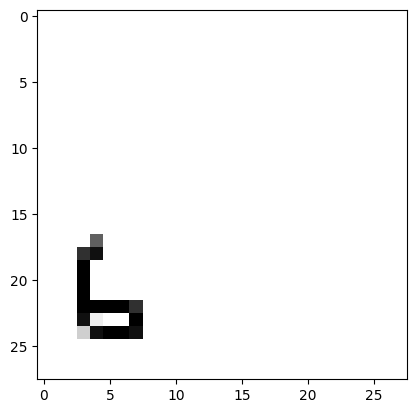

1/1 [==============================] - 0s 18ms/step
this image is probably a 7


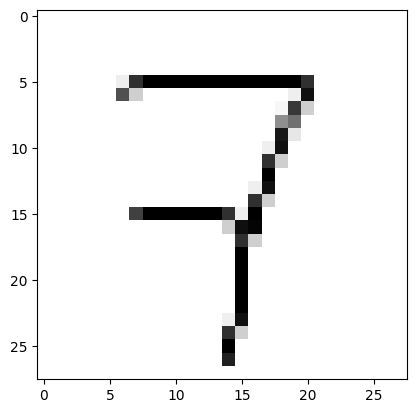

1/1 [==============================] - 0s 18ms/step
this image is probably a 0


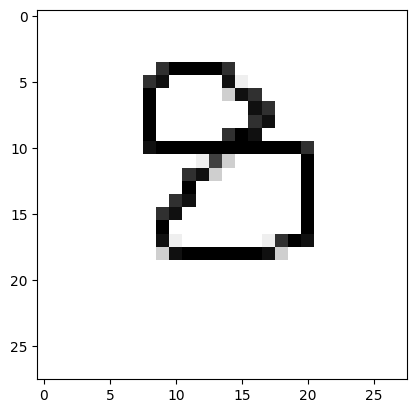

1/1 [==============================] - 0s 19ms/step
this image is probably a 9


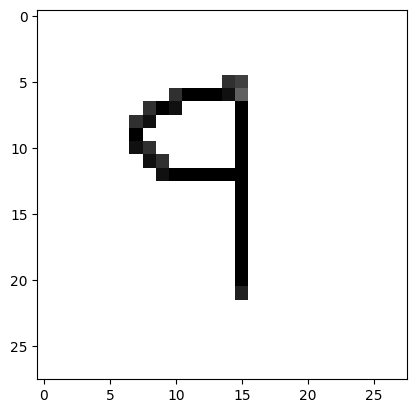

1/1 [==============================] - 0s 18ms/step
this image is probably a 3


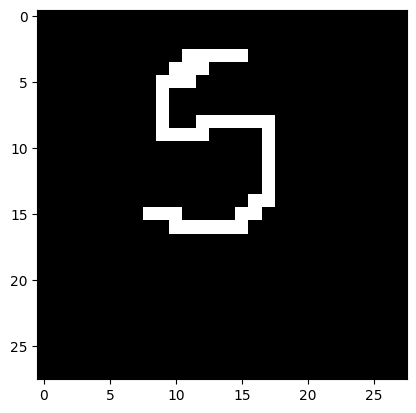

In [66]:
image_number=1
while os.path.isfile(f"my numbers/digit {image_number}.png"):
    img=cv2.imread(f"my numbers/digit {image_number}.png")[:,:,0]
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    print(f"this image is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    image_number += 1